# Ames Kaggle

## Reading in the CSV

In [245]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [860]:
#reading the csv
ames = pd.read_csv('train.csv')
ames.shape

(1460, 81)

In [30]:
#first look at data set
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [44]:
#some descriptive statistics
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.61,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.00,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.75,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.50,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.25,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.00,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [149]:
ames.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [41]:
ames.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1057,1058,60,RL,NaN,29959,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,248000
992,993,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,7,2007,WD,Normal,187000
463,464,70,RL,74.0,11988,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,188700
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
641,642,60,FV,NaN,7050,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,226000
430,431,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,COD,Abnorml,85400
421,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
1107,1108,60,RL,168.0,23257,Pave,NaN,IR3,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,274725
672,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000
243,244,160,RL,75.0,10762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,120000


In [51]:
#overview of column names
print(ames.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

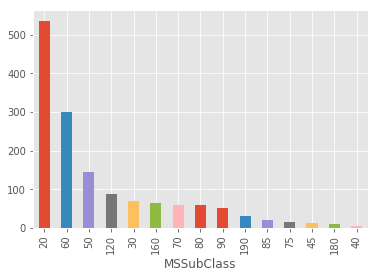

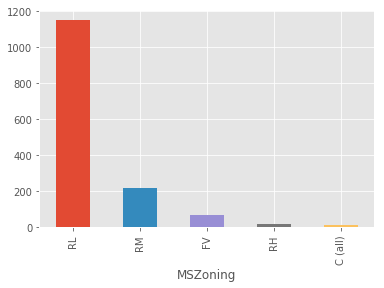

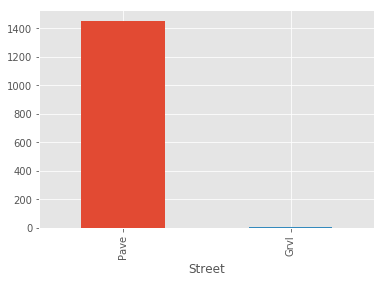

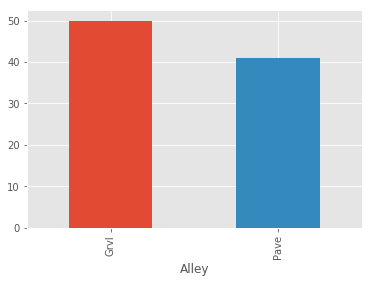

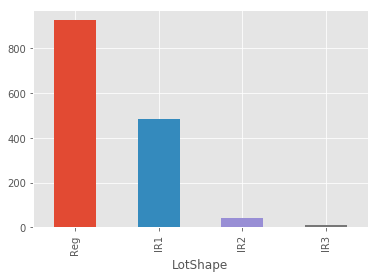

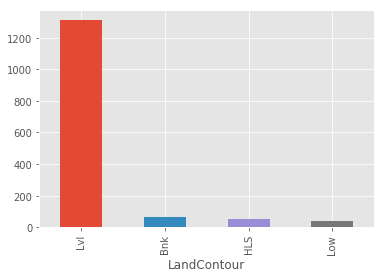

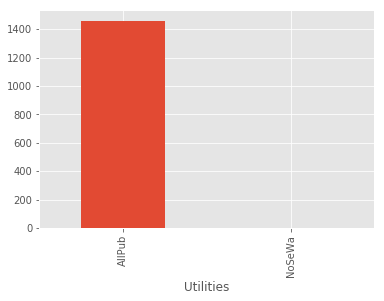

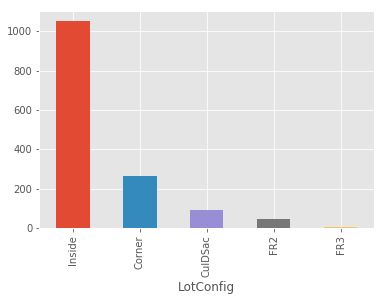

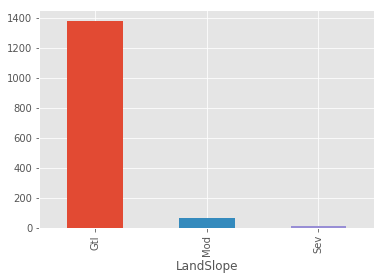

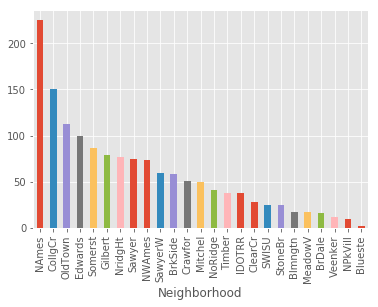

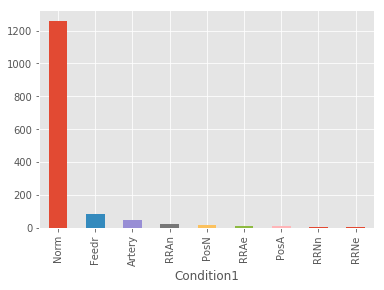

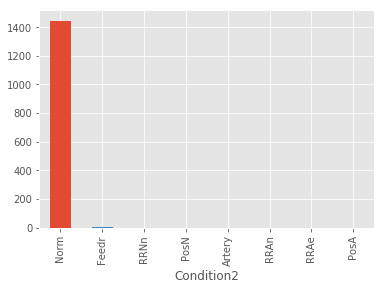

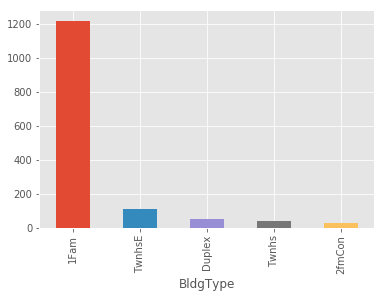

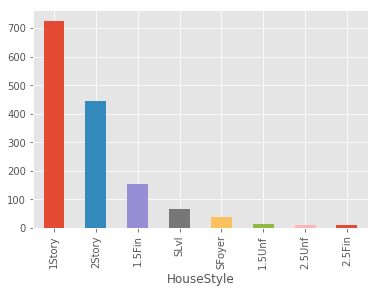

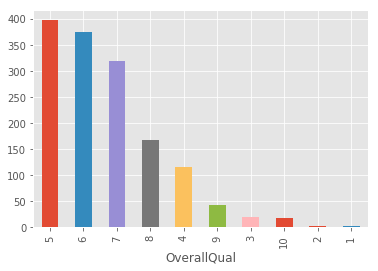

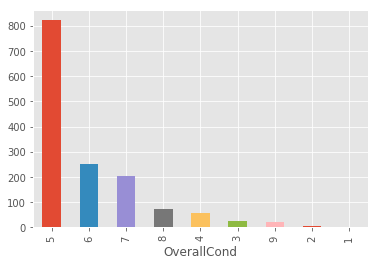

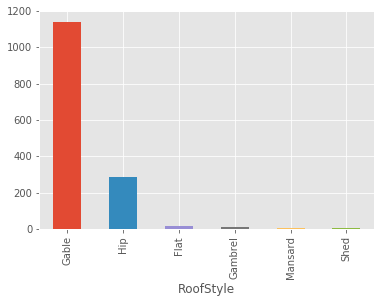

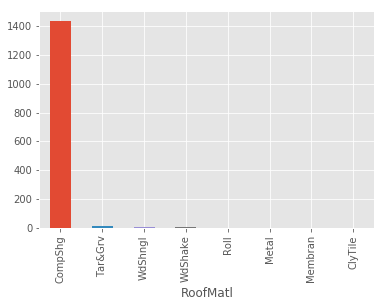

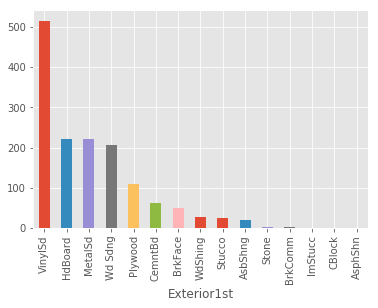

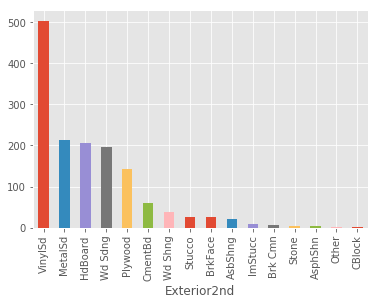

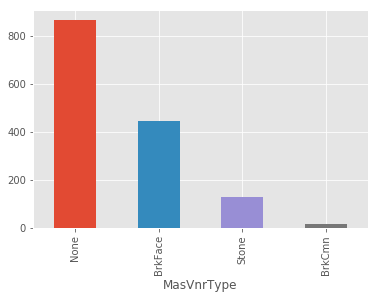

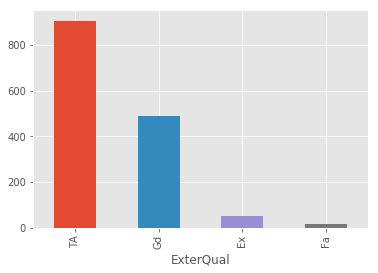

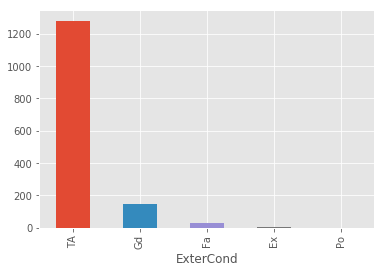

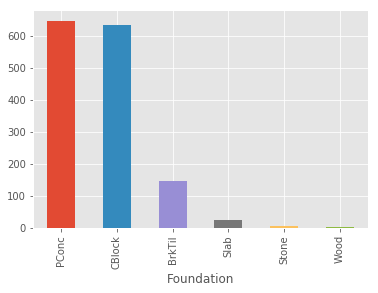

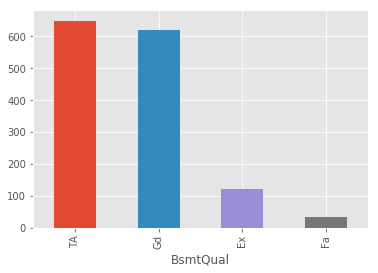

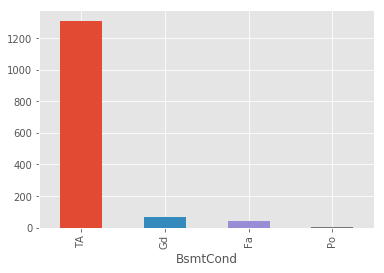

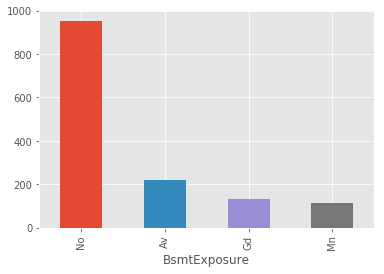

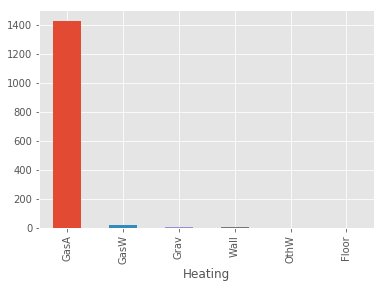

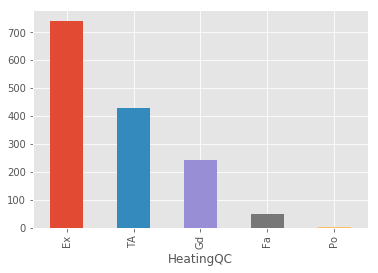

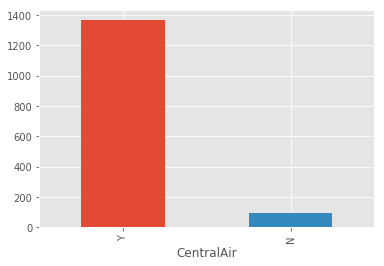

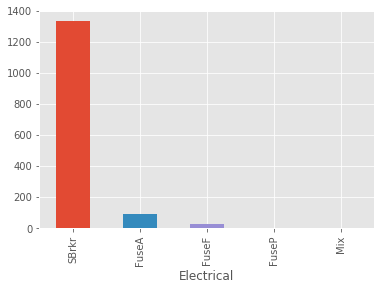

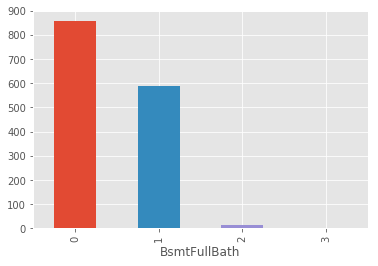

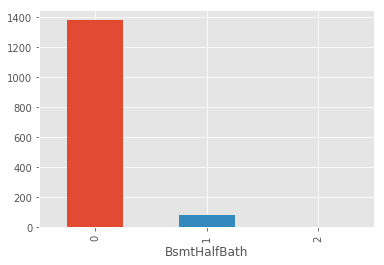

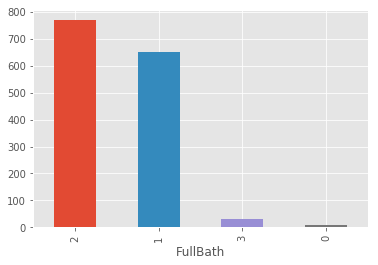

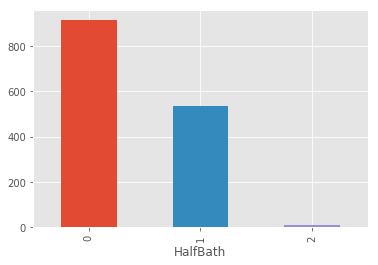

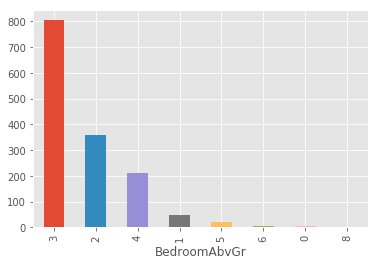

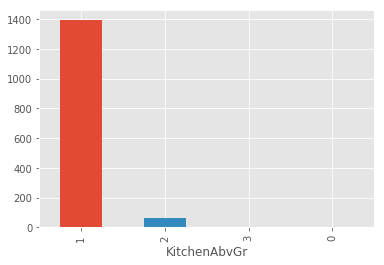

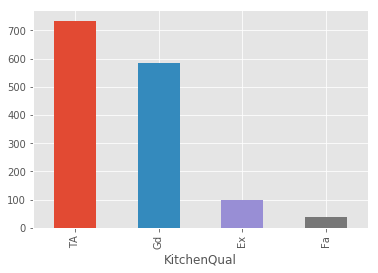

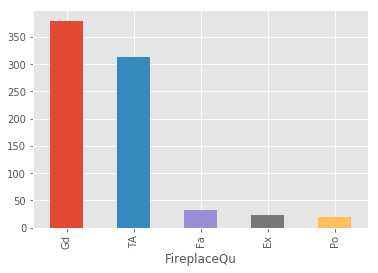

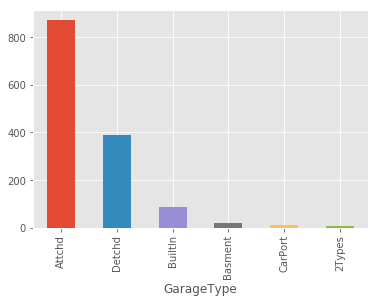

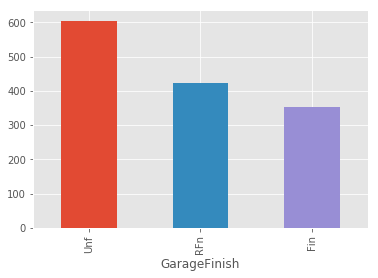

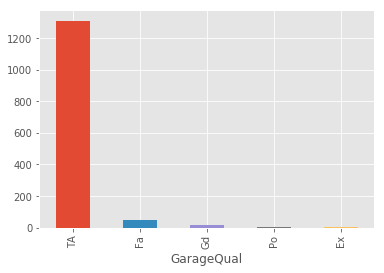

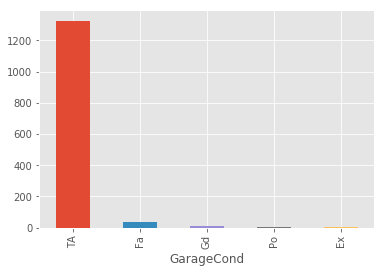

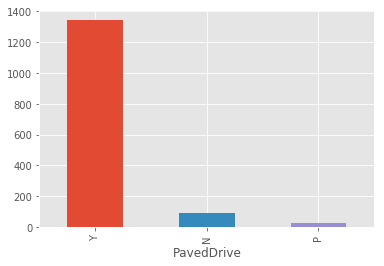

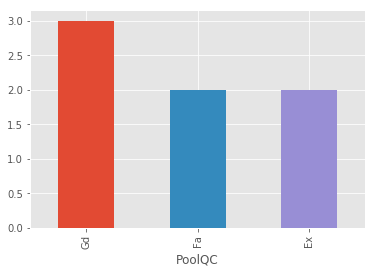

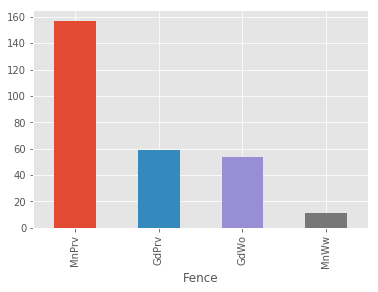

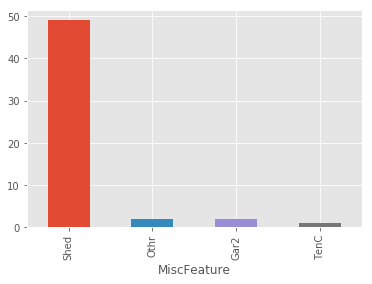

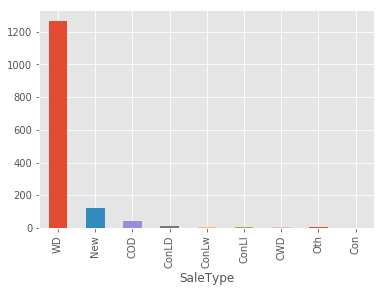

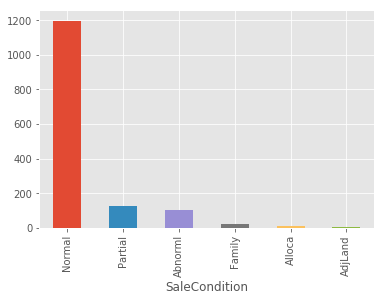

In [70]:
#taking a look at categorical data

categorical = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure','Heating', 'HeatingQC','CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','FireplaceQu', 'GarageType','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


for feature in categorical:
    
    class_count = ames.groupby(feature).size().sort_values(ascending=False).plot(kind='bar')
    plt.show()
    
    
    














### Observations from categorical plots

 - MSSubClass: Huge Imbalances, 20 and 60 most common
 - MSZoning: Huge imbalances, RL most common by far
 - Street: Pave **way** more common
 - Alley: **more or less** balanced
 - LotShape: imbalanced, more Reg
 - LandContour: far more Lvl
 - Utilities: Far mroe AllPub
 - LotConfig: Far more Inside
 - LandSlope: Far more Gtl
 - Neighborhood: NAmes and CollgCr more popular
 - Condition1: Norm most common by far
 - Condition2: Same as 1
 - BldgType: 1Fam by far most common
 - HouseSytle: 1Story & 2Story
 - OverallQual: Mostly 5, 6, 7
 - OverallCond: mostly 5
 - RoofStyle: Mostly Gable
 - RoofMatl: CompShg most common by **far**
 - Exterior1st: VinylSd most common, imbalanced
 - Exterior2nd: same as 1
 - MasVnrType: None most common 
 - ExterQual: TA most common
 
 --> most are heavily imbalanced!

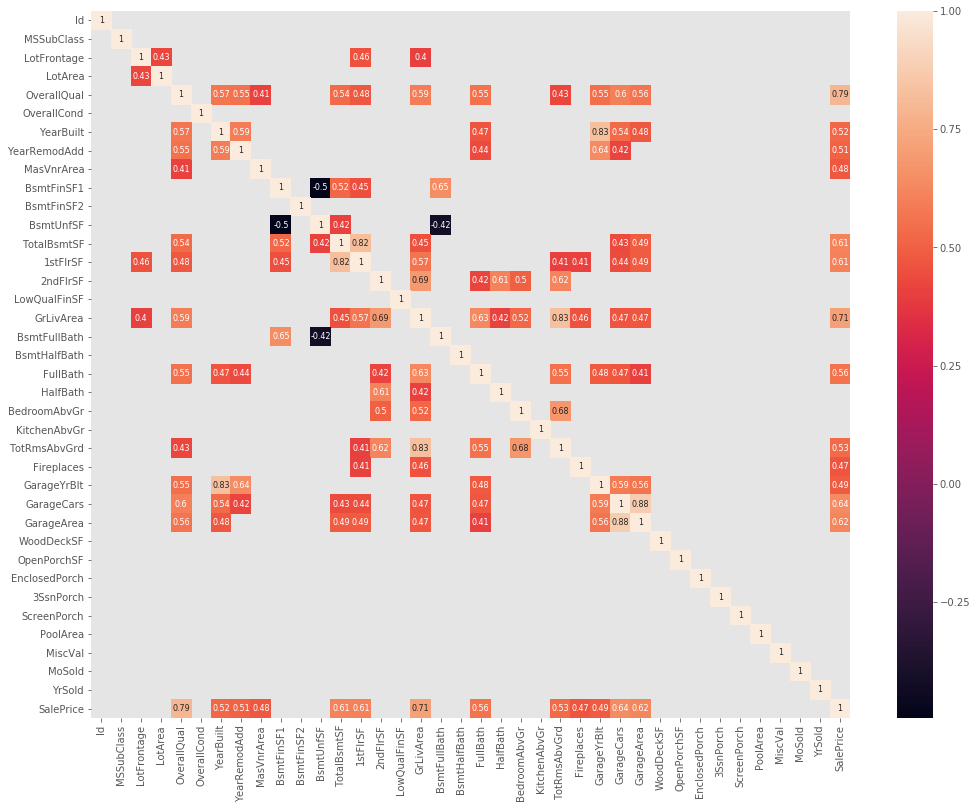

In [112]:
## Correlation

correlation = ames.corr(method='pearson')
plt.figure(figsize=(17,13))
sns.heatmap(correlation[(correlation > 0.4) | (correlation < -0.4)],  annot=True, annot_kws={"size": 8})


In [107]:
##skew

skew_ = pd.DataFrame(ames.skew(), columns=["skew"])
skew_[(skew_>1) | (skew_<-1)].dropna()

,skew
MSSubClass,1.408
LotFrontage,2.164
LotArea,12.208
MasVnrArea,2.669
BsmtFinSF1,1.686
BsmtFinSF2,4.255
TotalBsmtSF,1.524
1stFlrSF,1.377
LowQualFinSF,9.011
GrLivArea,1.367


## Visualizations

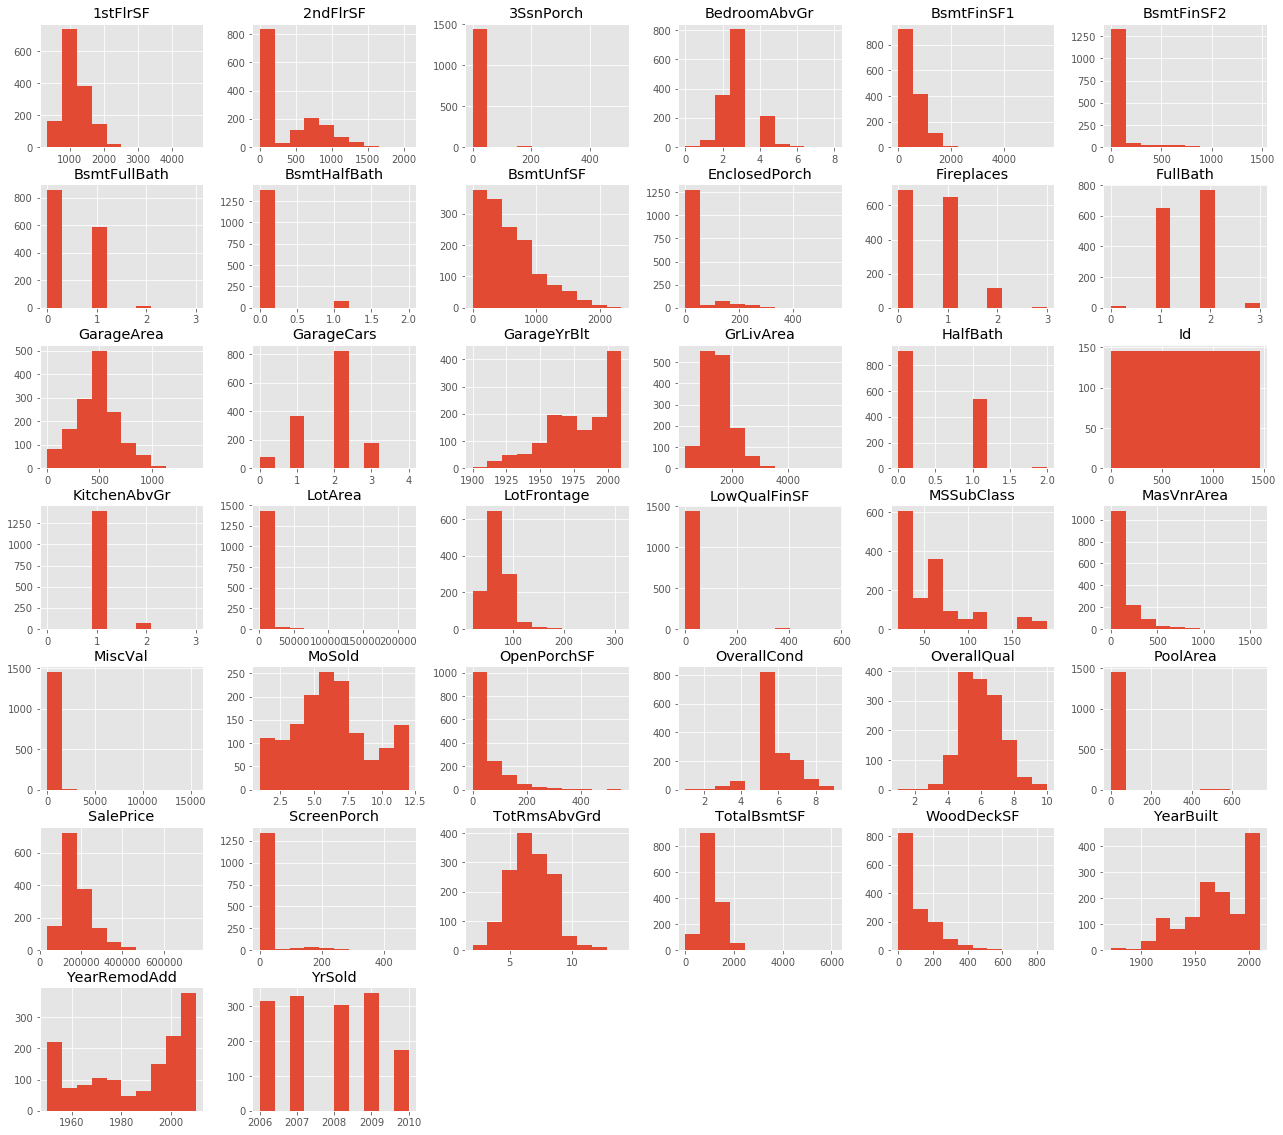

In [125]:
hist_overview = ames.hist(figsize=(22,20))

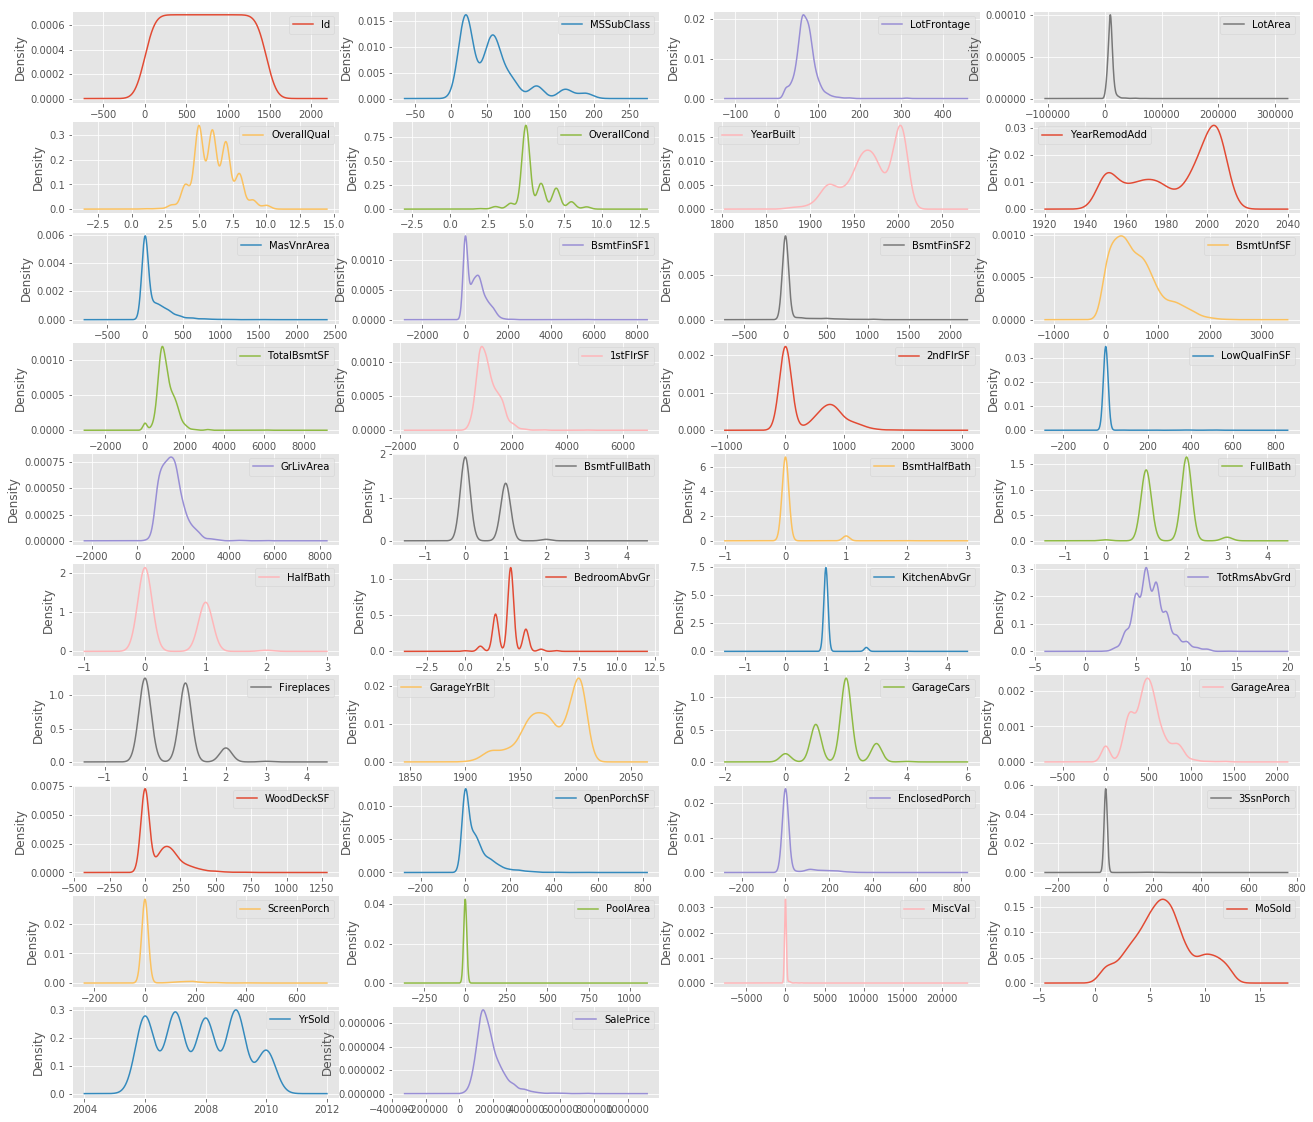

In [131]:
den_overview = ames.plot(kind='density', subplots=True, layout=(10, 4), sharex=False, figsize=(22,20))

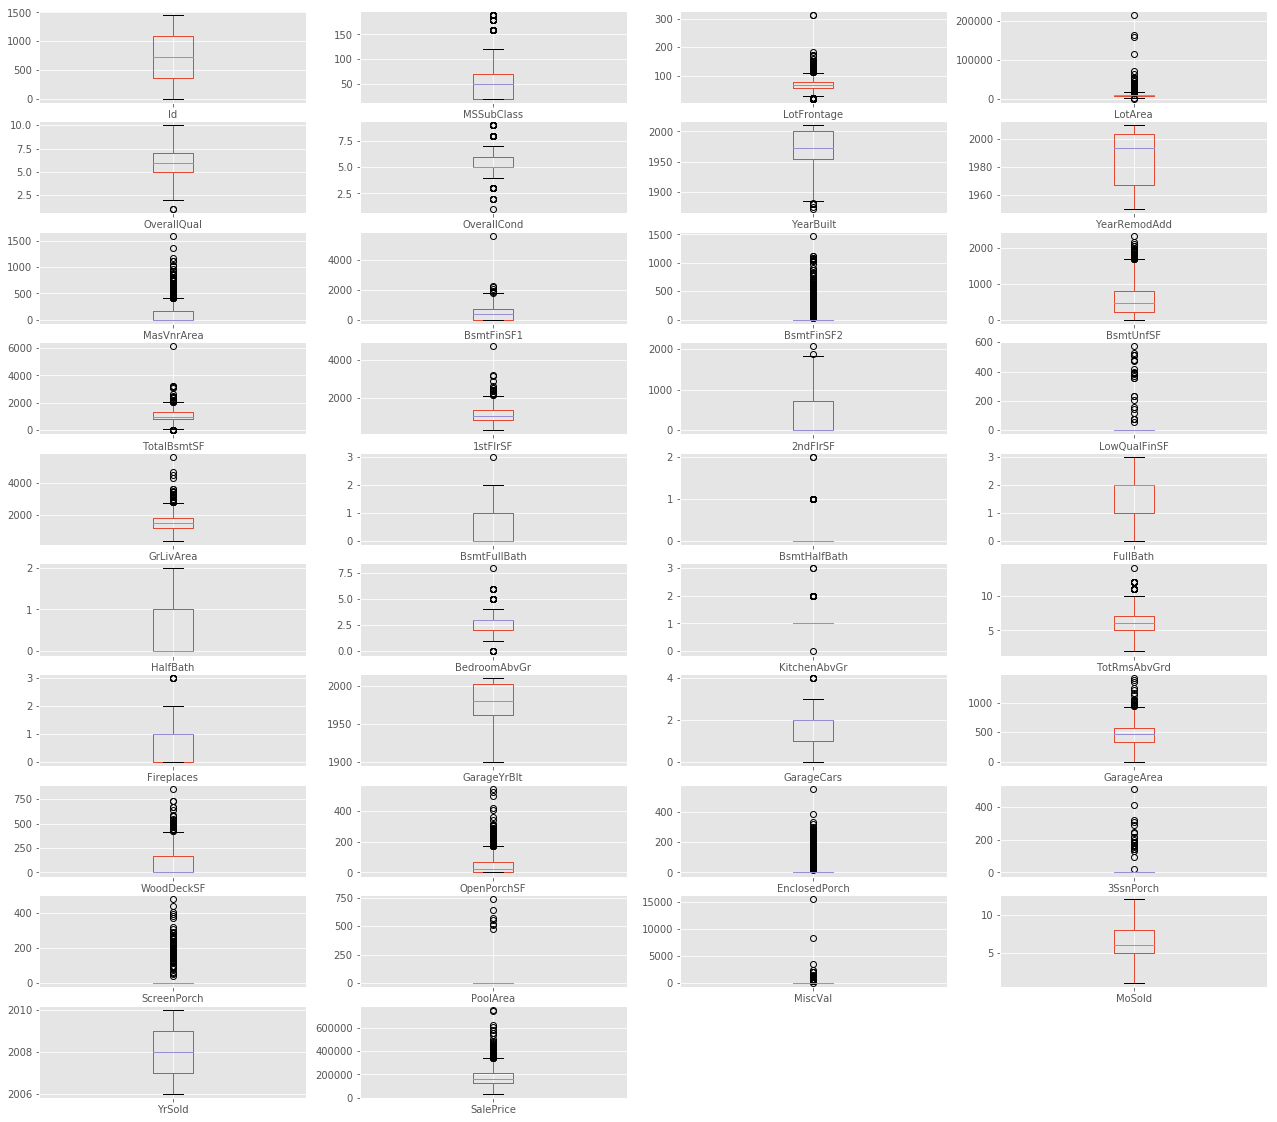

In [133]:
box_overview = ames.plot(kind='box', subplots=True, layout=(10,4), sharex=False, sharey=False, figsize=(22,20))

In [138]:
from pandas.plotting import scatter_matrix

#to impute in sklearn after train test split: 
# MasVnrType
# LotFrontage
# MasVnrType
#GarageYearBuilt

## Dealing w NaN's
to impute in sklearn after train test split: 
- MasVnrType
- LotFrontage
- MasVnrType
- GarageYearBuilt

In [861]:
#drop pool columns
ames.drop(['PoolArea', 'PoolQC'],axis=1, inplace=True)

In [862]:
#Replacing NaN's with 'NoAccess'
ames.Alley.fillna(value='NoAccess',inplace=True)

In [863]:
#Replacing Nan's with no basement
ames.BsmtQual.fillna(value='NoBsmt',inplace=True)

In [864]:
#Replacing Nan's with no basement
ames.BsmtCond.fillna(value='NoBsmt',inplace=True)

In [865]:
#Replacing Nan's with no basement
ames.BsmtExposure.fillna(value='NoBsmt',inplace=True)

In [866]:
#Replacing Nan's with no basement
ames.BsmtFinType1.fillna(value='NoBsmt',inplace=True)

In [867]:
#Replacing Nan's with no basement
ames.BsmtFinType2.fillna(value='NoBsmt',inplace=True)

In [868]:
#drop electrical missing row
ames.drop(ames[ames.Electrical.isna() == True].index, inplace=True)

In [869]:
#Replacing Nan's with no fireplace
ames.FireplaceQu.fillna(value='NoFpl',inplace=True)

In [870]:
#Replacing Nan's with no garage
ames.GarageType.fillna(value='NoGarage',inplace=True)

In [871]:
#Replacing Nan's with no garage
ames.GarageFinish.fillna(value='NoGarage',inplace=True)

In [872]:
#Replacing Nan's with no garage
ames.GarageQual.fillna(value='NoGarage',inplace=True)

In [873]:
#Replacing Nan's with no garage
ames.GarageCond.fillna(value='NoGarage',inplace=True)

In [874]:
#Replacing Nan's with no fence
ames.Fence.fillna(value='NoFence',inplace=True)

In [875]:
#Replacing Nan's with no fence
ames.MiscFeature.fillna(value='None',inplace=True)

## Feature Engineering

In [876]:
#combing Porches into a single column
PorchArea = ames.WoodDeckSF + ames.OpenPorchSF + ames.EnclosedPorch + ames['3SsnPorch'] + ames.ScreenPorch

In [877]:
new_columns = ames.columns.tolist()
new_columns.append('PorchArea')
print(new_columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscFeatur

In [878]:
ames = pd.concat([ames,PorchArea], axis=1)

In [879]:
ames.columns = new_columns

In [880]:
ames.corr()['SalePrice']

Id              -0.022
MSSubClass      -0.084
LotFrontage      0.352
LotArea          0.264
OverallQual      0.791
OverallCond     -0.078
YearBuilt        0.523
YearRemodAdd     0.507
MasVnrArea       0.477
BsmtFinSF1       0.386
BsmtFinSF2      -0.011
BsmtUnfSF        0.214
TotalBsmtSF      0.614
1stFlrSF         0.606
2ndFlrSF         0.319
LowQualFinSF    -0.026
GrLivArea        0.709
BsmtFullBath     0.227
BsmtHalfBath    -0.017
FullBath         0.561
HalfBath         0.284
BedroomAbvGr     0.168
KitchenAbvGr    -0.136
TotRmsAbvGrd     0.534
Fireplaces       0.467
GarageYrBlt      0.487
GarageCars       0.640
GarageArea       0.623
WoodDeckSF       0.324
OpenPorchSF      0.316
EnclosedPorch   -0.129
3SsnPorch        0.045
ScreenPorch      0.111
MiscVal         -0.021
MoSold           0.046
YrSold          -0.029
SalePrice        1.000
PorchArea        0.391
Name: SalePrice, dtype: float64

In [881]:
ames.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1,inplace=True)

In [882]:
#Total Bathrooms
Bathrooms = ames.BsmtFullBath + ames.BsmtHalfBath + .5*(ames.FullBath + ames.HalfBath)

In [883]:
new_columns = ames.columns.tolist()
new_columns.append('TotBathrooms')
print(new_columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice

In [884]:
ames = pd.concat([ames,Bathrooms], axis=1)
ames.columns = new_columns

In [885]:
ames.corr()['GarageCars']

Id              0.016
MSSubClass     -0.040
LotFrontage     0.286
LotArea         0.155
OverallQual     0.601
OverallCond    -0.186
YearBuilt       0.538
YearRemodAdd    0.421
MasVnrArea      0.364
BsmtFinSF1      0.224
BsmtFinSF2     -0.038
BsmtUnfSF       0.214
TotalBsmtSF     0.435
1stFlrSF        0.440
2ndFlrSF        0.184
LowQualFinSF   -0.094
GrLivArea       0.467
BsmtFullBath    0.132
BsmtHalfBath   -0.021
FullBath        0.470
HalfBath        0.219
BedroomAbvGr    0.086
KitchenAbvGr   -0.051
TotRmsAbvGrd    0.362
Fireplaces      0.301
GarageYrBlt     0.589
GarageCars      1.000
GarageArea      0.883
MiscVal        -0.043
MoSold          0.041
YrSold         -0.039
SalePrice       0.640
PorchArea       0.237
TotBathrooms    0.386
Name: GarageCars, dtype: float64

In [886]:
ames.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1,inplace=True)

In [887]:
ames.shape

(1459, 72)

In [888]:
##bathroom-to-bedroom ratio
BathBedRatio = ames.TotBathrooms/ames.BedroomAbvGr

In [889]:
new_columns = ames.columns.tolist()
new_columns.append('BathBedRatio')
print(new_columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'PorchArea', 'TotBathrooms', 'BathBedRatio']


In [890]:
ames = pd.concat([ames,BathBedRatio], axis=1)

In [891]:
ames.columns = new_columns

In [892]:
ames.corr()['SalePrice']

Id             -0.022
MSSubClass     -0.084
LotFrontage     0.352
LotArea         0.264
OverallQual     0.791
OverallCond    -0.078
YearBuilt       0.523
YearRemodAdd    0.507
MasVnrArea      0.477
BsmtFinSF1      0.386
BsmtFinSF2     -0.011
BsmtUnfSF       0.214
TotalBsmtSF     0.614
1stFlrSF        0.606
2ndFlrSF        0.319
LowQualFinSF   -0.026
GrLivArea       0.709
BedroomAbvGr    0.168
KitchenAbvGr   -0.136
TotRmsAbvGrd    0.534
Fireplaces      0.467
GarageYrBlt     0.487
GarageCars      0.640
GarageArea      0.623
MiscVal        -0.021
MoSold          0.046
YrSold         -0.029
SalePrice       1.000
PorchArea       0.391
TotBathrooms    0.529
BathBedRatio    0.328
Name: SalePrice, dtype: float64

In [893]:
##Garage Area and Garage Cars basically descirbing the same thing

In [894]:
PerCarGarArea = ames.GarageArea*ames.GarageCars

In [895]:
new_columns = ames.columns.tolist()
new_columns.append('PerCarGarArea')
print(new_columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'PorchArea', 'TotBathrooms', 'BathBedRatio', 'PerCarG

In [896]:
ames = pd.concat([ames,PerCarGarArea], axis=1)

In [897]:
ames.columns = new_columns

In [898]:
ames.corr()['SalePrice']

Id              -0.022
MSSubClass      -0.084
LotFrontage      0.352
LotArea          0.264
OverallQual      0.791
OverallCond     -0.078
YearBuilt        0.523
YearRemodAdd     0.507
MasVnrArea       0.477
BsmtFinSF1       0.386
BsmtFinSF2      -0.011
BsmtUnfSF        0.214
TotalBsmtSF      0.614
1stFlrSF         0.606
2ndFlrSF         0.319
LowQualFinSF    -0.026
GrLivArea        0.709
BedroomAbvGr     0.168
KitchenAbvGr    -0.136
TotRmsAbvGrd     0.534
Fireplaces       0.467
GarageYrBlt      0.487
GarageCars       0.640
GarageArea       0.623
MiscVal         -0.021
MoSold           0.046
YrSold          -0.029
SalePrice        1.000
PorchArea        0.391
TotBathrooms     0.529
BathBedRatio     0.328
PerCarGarArea    0.680
Name: SalePrice, dtype: float64

In [899]:
ames.drop(['GarageArea', 'GarageCars'], axis=1,inplace=True)

In [900]:
ames.groupby('GarageQual').mean()['SalePrice'].sort_values()

GarageQual
Po          100166.667
NoGarage    103317.284
Fa          123573.354
TA          187505.095
Gd          215860.714
Ex          241000.000
Name: SalePrice, dtype: float64

#### Replacing Ordinal Categorical Values with numbers and getting rid of correlated ones by combining them


In [901]:
##YearBuilt provides less info than YearRemodAdd
##years since remodeling replacement

YrSinceRemod = ames.YrSold - ames.YearRemodAdd

In [902]:
YrSinceRemod.describe()

count    1459.000
mean       22.965
std        20.640
min        -1.000
25%         4.000
50%        14.000
75%        41.000
max        60.000
dtype: float64

In [903]:
new_columns = ames.columns.tolist()
new_columns.append('YrSinceRemod')
print(new_columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'PorchArea', 'TotBathrooms', 'BathBedRatio', 'PerCarGarArea', 'YrSinceRemod']


In [904]:
ames = pd.concat([ames,YrSinceRemod], axis=1)

In [905]:
ames.columns = new_columns

In [906]:
ames.corr()['OverallQual']

Id              -0.028
MSSubClass       0.033
LotFrontage      0.252
LotArea          0.106
OverallQual      1.000
OverallCond     -0.092
YearBuilt        0.573
YearRemodAdd     0.552
MasVnrArea       0.412
BsmtFinSF1       0.239
BsmtFinSF2      -0.059
BsmtUnfSF        0.308
TotalBsmtSF      0.538
1stFlrSF         0.476
2ndFlrSF         0.296
LowQualFinSF    -0.031
GrLivArea        0.593
BedroomAbvGr     0.102
KitchenAbvGr    -0.184
TotRmsAbvGrd     0.428
Fireplaces       0.396
GarageYrBlt      0.549
MiscVal         -0.031
MoSold           0.071
YrSold          -0.027
SalePrice        0.791
PorchArea        0.306
TotBathrooms     0.418
BathBedRatio     0.281
PerCarGarArea    0.595
YrSinceRemod    -0.553
Name: OverallQual, dtype: float64

In [907]:
ames.drop(['YrSold', 'YearRemodAdd', 'YearBuilt'], axis=1,inplace=True)

In [908]:
ames.shape

(1459, 70)

In [909]:
##ExterCond & ExterQual
ames.ExterQual = ames.ExterQual.str.replace('Ex', '5')
ames.ExterQual = ames.ExterQual.str.replace('Gd', '4')
ames.ExterQual =ames.ExterQual.str.replace('TA', '3')
ames.ExterQual =ames.ExterQual.str.replace('Fa', '2')
ames.ExterQual =ames.ExterQual.str.replace('Po', '1')
ames.ExterQual = ames.ExterQual.astype(int)

In [910]:
ames.ExterCond = ames.ExterCond.str.replace('Ex', '5')
ames.ExterCond = ames.ExterCond.str.replace('Gd', '4')
ames.ExterCond =ames.ExterCond.str.replace('TA', '3')
ames.ExterCond =ames.ExterCond.str.replace('Fa', '2')
ames.ExterCond =ames.ExterCond.str.replace('Po', '1')
ames.ExterCond = ames.ExterCond.astype(int)

In [911]:
Exterior = ames.ExterQual * ames.ExterCond

In [912]:
new_columns = ames.columns.tolist()
new_columns.append('Exterior')
print(new_columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'PorchArea', 'TotBathrooms', 'BathBedRatio', 'PerCarGarArea', 'YrSinceRemod', 'Exterior']


In [913]:
ames = pd.concat([ames,Exterior], axis=1)

In [914]:
ames.columns = new_columns

In [915]:
ames.drop(['ExterQual', 'ExterCond'], axis=1, inplace = True)

In [916]:
##BsmtCond & BsmtQual

ames.BsmtCond = ames.BsmtCond.str.replace('Ex', '5')
ames.BsmtCond = ames.BsmtCond.str.replace('Gd', '4')
ames.BsmtCond =ames.BsmtCond.str.replace('TA', '3')
ames.BsmtCond =ames.BsmtCond.str.replace('Fa', '2')
ames.BsmtCond =ames.BsmtCond.str.replace('Po', '1')
ames.BsmtCond =ames.BsmtCond.str.replace('NoBsmt', '0')
ames.BsmtCond = ames.BsmtCond.astype(int)

In [917]:
ames.BsmtQual = ames.BsmtQual.str.replace('Ex', '5')
ames.BsmtQual = ames.BsmtQual.str.replace('Gd', '4')
ames.BsmtQual =ames.BsmtQual.str.replace('TA', '3')
ames.BsmtQual =ames.BsmtQual.str.replace('Fa', '2')
ames.BsmtQual =ames.BsmtQual.str.replace('Po', '1')
ames.BsmtQual =ames.BsmtQual.str.replace('NoBsmt', '0')
ames.BsmtQual = ames.BsmtQual.astype(int)

In [918]:
BsmtQualCond = ames.BsmtCond * ames.BsmtQual

In [919]:
new_columns = ames.columns.tolist()
new_columns.append('BsmtQualCond')
print(new_columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'PorchArea', 'TotBathrooms', 'BathBedRatio', 'PerCarGarArea', 'YrSinceRemod', 'Exterior', 'BsmtQualCond']


In [920]:
ames = pd.concat([ames,BsmtQualCond], axis=1)

In [921]:
ames.columns = new_columns

In [922]:
ames.corr()['SalePrice']

Id              -0.022
MSSubClass      -0.084
LotFrontage      0.352
LotArea          0.264
OverallQual      0.791
OverallCond     -0.078
MasVnrArea       0.477
BsmtQual         0.585
BsmtCond         0.213
BsmtFinSF1       0.386
BsmtFinSF2      -0.011
BsmtUnfSF        0.214
TotalBsmtSF      0.614
1stFlrSF         0.606
2ndFlrSF         0.319
LowQualFinSF    -0.026
GrLivArea        0.709
BedroomAbvGr     0.168
KitchenAbvGr    -0.136
TotRmsAbvGrd     0.534
Fireplaces       0.467
GarageYrBlt      0.487
MiscVal         -0.021
MoSold           0.046
SalePrice        1.000
PorchArea        0.391
TotBathrooms     0.529
BathBedRatio     0.328
PerCarGarArea    0.680
YrSinceRemod    -0.509
Exterior         0.576
BsmtQualCond     0.572
Name: SalePrice, dtype: float64

In [923]:
ames.drop(['BsmtQual', 'BsmtCond', 'Id'], axis=1, inplace=True)

In [924]:
ames.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
PerCarGarArea    0.680
TotalBsmtSF      0.614
1stFlrSF         0.606
Exterior         0.576
BsmtQualCond     0.572
TotRmsAbvGrd     0.534
TotBathrooms     0.529
GarageYrBlt      0.487
MasVnrArea       0.477
Fireplaces       0.467
PorchArea        0.391
BsmtFinSF1       0.386
LotFrontage      0.352
BathBedRatio     0.328
2ndFlrSF         0.319
LotArea          0.264
BsmtUnfSF        0.214
BedroomAbvGr     0.168
MoSold           0.046
BsmtFinSF2      -0.011
MiscVal         -0.021
LowQualFinSF    -0.026
OverallCond     -0.078
MSSubClass      -0.084
KitchenAbvGr    -0.136
YrSinceRemod    -0.509
Name: SalePrice, dtype: float64

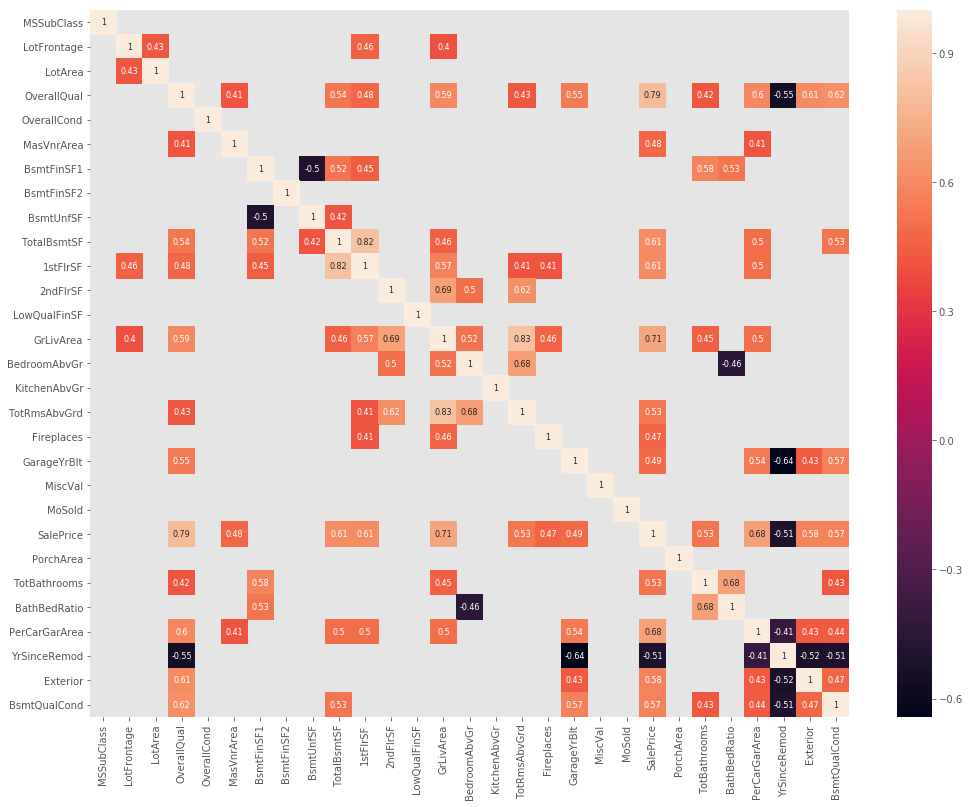

In [925]:
correlation = ames.corr(method='pearson')
plt.figure(figsize=(17,13))
sns.heatmap(correlation[(correlation > 0.4) | (correlation < -0.4)],  annot=True, annot_kws={"size": 8})



In [932]:
#Average Room Size
AvgRoomSize = ames.GrLivArea / ames.TotRmsAbvGrd

In [933]:
new_columns = ames.columns.tolist()
new_columns.append('AvgRoomSize')
print(new_columns)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'PorchArea', 'TotBathrooms', 'BathBedRatio', 'PerCarGarArea', 'YrSinceRemod', 'Exterior', 'BsmtQualCond', 'AvgRoomSize']


In [934]:
ames = pd.concat([ames,AvgRoomSize], axis=1)

In [935]:
ames.columns = new_columns

In [942]:
corr=pd.DataFrame(ames.corr()['SalePrice'].sort_values(ascending=False))
corr[(corr>0.4) | (corr<-0.4)]

,SalePrice
SalePrice,1.000
OverallQual,0.791
GrLivArea,0.709
PerCarGarArea,0.680
TotalBsmtSF,0.614
1stFlrSF,0.606
Exterior,0.576
BsmtQualCond,0.572
AvgRoomSize,0.541
TotRmsAbvGrd,0.534
